In [10]:
import numpy as np
from matplotlib import pyplot as plt
from src.engine.generate import generate
from src.models.character_generator import CharacterGenerator
from src .utils.character_dataset import CharacterDataset
from src.utils.io import load_model, get_text
from src.utils.io import load_results
import torch

In [11]:
def plot_results(*args, labels: tuple = ()):

    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    for idx, result in enumerate(args):
        label = f"r{idx + 1}" if len(labels) < idx else f"{labels[idx]}"
        ax[0].plot(result["Time"], result["Loss"].apply(np.exp), label = label)
        ax[1].plot(result["Time"], result["Accuracy"], label = label)

    ax[0].set_xlabel("time/s")
    ax[0].set_ylabel("perplexity")
    ax[0].legend()
    ax[1].set_xlabel("time/s")
    ax[1].set_ylabel("accuracy")
    ax[1].legend()

    fig.tight_layout()
    plt.show()

Loaded macbeth_LR0.0003_E5_BK256_V66_D256_B64_T8_H8_PN1024_DP0.2.csv from directory: /Users/Eric/PycharmProjects/Transformer_no_hugging_face/logs/2025-03-23
Loaded bee_movie_LR0.0003_E4_BK256_V70_D256_B64_T8_H8_PN1024_DP0.2.csv from directory: /Users/Eric/PycharmProjects/Transformer_no_hugging_face/logs/2025-03-23
Loaded hamilton_LR0.0003_E4_BK256_V82_D256_B64_T8_H8_PN1024_DP0.2.csv from directory: /Users/Eric/PycharmProjects/Transformer_no_hugging_face/logs/2025-03-23


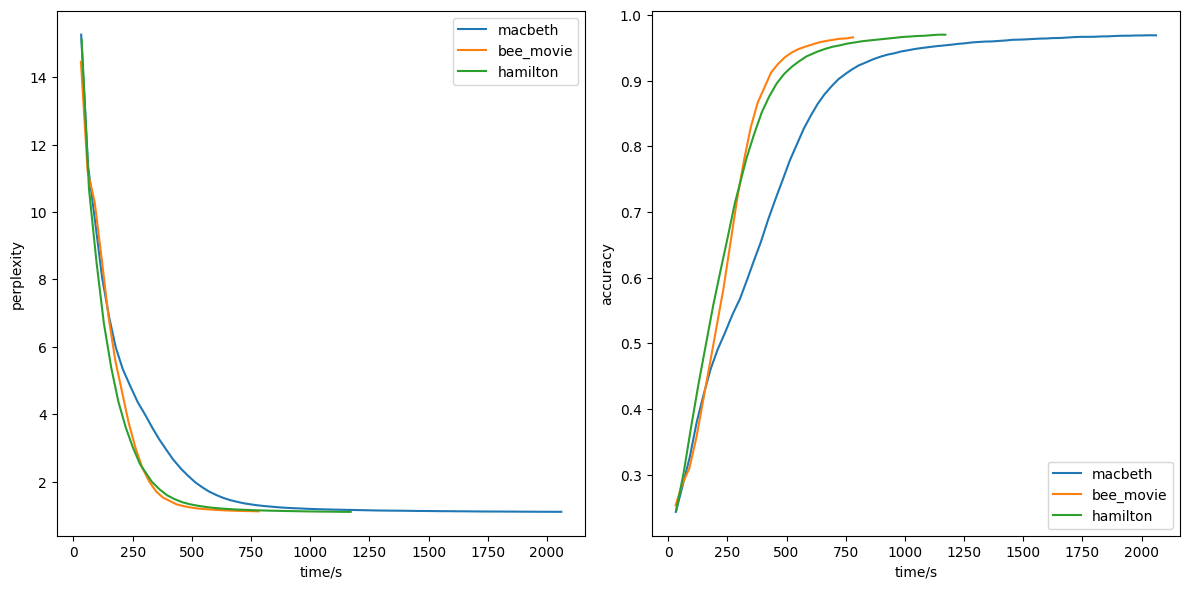

In [12]:
date_dir = "2025-03-23"
macbeth = load_results(date_dir= date_dir,
             exp_name= "macbeth_LR0.0003_E5_BK256_V66_D256_B64_T8_H8_PN1024_DP0.2.csv")
bee_movie = load_results(date_dir= date_dir,
             exp_name= "bee_movie_LR0.0003_E4_BK256_V70_D256_B64_T8_H8_PN1024_DP0.2.csv")
hamilton = load_results(date_dir= date_dir,
             exp_name= "hamilton_LR0.0003_E4_BK256_V82_D256_B64_T8_H8_PN1024_DP0.2.csv")

plot_results(macbeth, bee_movie, hamilton, labels= ("macbeth", "bee_movie", "hamilton"))

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
macbeth_model = CharacterGenerator(vocab_size=66,
                           embedding_dim=256,
                           num_transformers=8,
                           num_heads=8,
                           ffnn_hidden_neurons=1024)

macbeth_model: CharacterGenerator = load_model(macbeth_model,
                                       "macbeth_LR0.0003_E5_BK256_V66_D256_B64_T8_H8_PN1024_DP0.2.pth",
                                       device=device)

bee_movie_model = CharacterGenerator(vocab_size=70,
                           embedding_dim=256,
                           num_transformers=8,
                           num_heads=8,
                           ffnn_hidden_neurons=1024)

bee_movie_model: CharacterGenerator = load_model(bee_movie_model,
                                       "bee_movie_LR0.0003_E4_BK256_V70_D256_B64_T8_H8_PN1024_DP0.2.pth",
                                       device=device)

hamilton_model = CharacterGenerator(vocab_size=82,
                           embedding_dim=256,
                           num_transformers=8,
                           num_heads=8,
                           ffnn_hidden_neurons=1024)

hamilton_model: CharacterGenerator = load_model(hamilton_model,
                                       "hamilton_LR0.0003_E4_BK256_V82_D256_B64_T8_H8_PN1024_DP0.2.pth",
                                       device=device)

Loaded macbeth_LR0.0003_E5_BK256_V66_D256_B64_T8_H8_PN1024_DP0.2.pth from directory /Users/Eric/PycharmProjects/Transformer_no_hugging_face/models
Loaded bee_movie_LR0.0003_E4_BK256_V70_D256_B64_T8_H8_PN1024_DP0.2.pth from directory /Users/Eric/PycharmProjects/Transformer_no_hugging_face/models
Loaded hamilton_LR0.0003_E4_BK256_V82_D256_B64_T8_H8_PN1024_DP0.2.pth from directory /Users/Eric/PycharmProjects/Transformer_no_hugging_face/models


In [5]:
macbeth_text = get_text("macbeth")
block_size = 256
seed_text = "Do you know Joe?"
generated_length = 500
stochastic = True

macbeth_dataset = CharacterDataset(macbeth_text, block_size)

macbeth_generated_text = generate(seed_text= seed_text,
                                  model=macbeth_model,
                                  dataset= macbeth_dataset,
                                  generation_length= generated_length,
                                  block_size= block_size,
                                  device= device,
                                  stochastic= stochastic)
print(macbeth_generated_text)

Loaded macbeth_LR0.0003_E5_BK256_V66_D256_B64_T8_H8_PN1024_DP0.2.pth from directory /Users/Eric/PycharmProjects/Transformer_no_hugging_face/models
Do you know Joe?
MACBETH. Knocking within.
Wake Duncan with thy knocking! I would thou couldst!
Exeunt.

SCENE III.
The same.

Enter a Porter. Knocking within.

PORTER. Here's a knocking indeed! If a man were porter of Hell
Gate, he should have old turning the key. [Knocking within.]
Knock, knock, knock! Who's there, i' the name of Belzebub?
Here's
a farmer that hanged himself on th' expectation of plenty.
Come
in time! Have napkins enow about you; here you'll sweat
for't.
[Knocking within.] Knock, knock! Who's


In [6]:
bee_movie_text = get_text("bee_movie")
block_size = 256
seed_text = "Sigma sigma on the wall who's the fairest of them all"
generated_length = 500
stochastic = False

bee_movie_dataset = CharacterDataset(bee_movie_text, block_size)

bee_movie_generated_text = generate(seed_text= seed_text,
                                  model=bee_movie_model,
                                  dataset= bee_movie_dataset,
                                  generation_length= generated_length,
                                  block_size= block_size,
                                  device= device,
                                  stochastic= stochastic)
print(bee_movie_generated_text)

Loaded bee_movie_LR0.0003_E4_BK256_V70_D256_B64_T8_H8_PN1024_DP0.2.pth from directory /Users/Eric/PycharmProjects/Transformer_no_hugging_face/models
Sigma sigma on the wall who's the fairest of them all things.
It's got to f all little bawyers.
How old are you?
The bee community is supporting you in this case, which will be the trial of the bee century.
You know, they have a Larry King in the human world too.
It's a common name. Next week...
He looks like you and has a show and suspenders and colored dots...
Next week...
Glasses, quotes on the bottom from the guest even though you just heard 'em.
Bear Week next week! They're scary, hairy and here live.
Always leans forward, pointy shoulders, s


In [7]:
hamilton_text = get_text("hamilton")
block_size = 256
seed_text = "Jotoro Kujo"
generated_length = 500
stochastic = True

hamilton_dataset = CharacterDataset(hamilton_text, block_size)


hamilton_generated_text = generate(seed_text= seed_text,
                                  model=hamilton_model,
                                  dataset= hamilton_dataset,
                                  generation_length=generated_length,
                                  block_size=block_size,
                                  device=device,
                                  stochastic=stochastic)
print(hamilton_generated_text)

Loaded hamilton_LR0.0003_E4_BK256_V82_D256_B64_T8_H8_PN1024_DP0.2.pth from directory /Users/Eric/PycharmProjects/Transformer_no_hugging_face/models
Jotoro Kujom!
Alexander for the King!

A message from the King!
FULL COMPANY
A message from the King!

22

7. You’ll Be Back
KING GEORGE
You say
the price of my love’s not a price that you’re willing to pay.
You cry
in your tea which you hurl in the sea when you see me go by.
Why so sad?
Remember we made an arrangement when you went away,
now you’re making me mad.
Remember, despite our estrangement, I’m your man.
You’ll be back.
Soon you’ll see.
You’ll remember you belong to me.
You’ll be back.
Time will t
